# Transform


In [1]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[(1, 10)])
spot.transform_value(10., 'log10')
spot.transform_value(100., 'log')
spot.transform_value(4., 'sqrt')
spot.transform_value(2., 'exp')
spot.transform_value(3., 'square')

9.0

In [2]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[(1, 10)])
spot.inverse_transform_value(1.0, 'log10')
spot.inverse_transform_value(4.605170185988092, 'log')
spot.inverse_transform_value(2.0, 'sqrt')


4.0

In [3]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[('red', 'green', 'blue'), (0, 10)])
spot.process_factor_bounds()
print(spot.bounds)


[(0, 2), (0, 10)]


In [4]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[('red', 'green', 'blue'), (0, 10)])
spot.detect_var_type()
['factor', 'float']

['factor', 'float']

In [5]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[(0.5, 10.5)], var_type=['int'])
print(spot.bounds)
spot = SpotOptim(fun=lambda x: x, bounds=[(0, 10)], var_type=['float'])
spot.bounds


[(1, 10)]


[(0.0, 10.0)]

In [6]:
from spotoptim import SpotOptim
spot = SpotOptim(fun=lambda x: x, bounds=[(1, 10), (0.1, 100)])
spot.var_trans = ['log10', 'sqrt']
spot.transform_bounds()
print(spot.bounds)

[(0.0, 1.0), (0.31622776601683794, 10.0)]


## Morris Mitchell

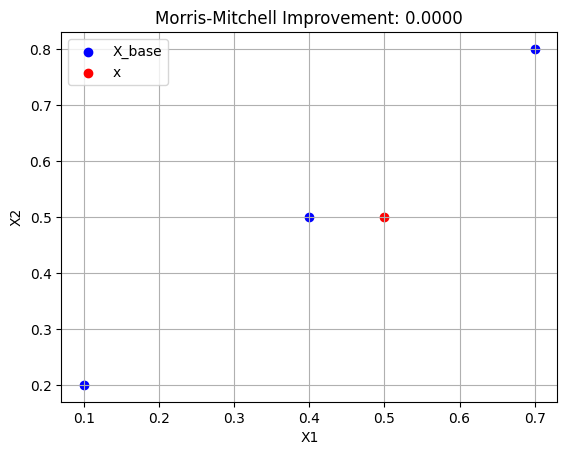

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from spotoptim.sampling.mm import mm_improvement
X_base = np.array([[0.1, 0.2], [0.4, 0.5], [0.7, 0.8]])
x = np.array([0.5, 0.5])
improvement = mm_improvement(x, X_base, q=2, p=2)
plt.scatter(X_base[:, 0], X_base[:, 1], color='blue', label='X_base')
plt.scatter(x[0], x[1], color='red', label='x')
plt.legend()
plt.title(f'Morris-Mitchell Improvement: {improvement:.4f}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

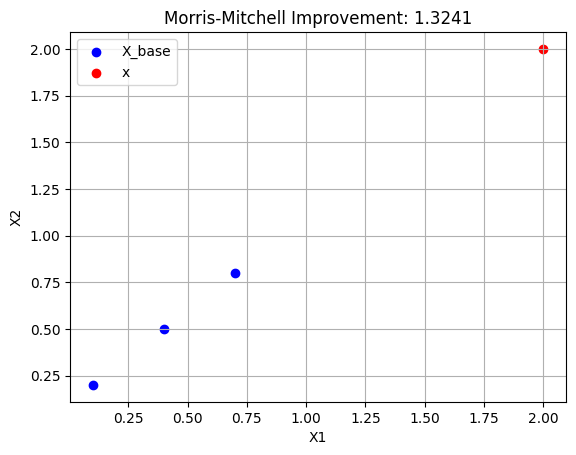

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from spotoptim.sampling.mm import mm_improvement
X_base = np.array([[0.1, 0.2], [0.4, 0.5], [0.7, 0.8]])
x = np.array([2, 2])
improvement = mm_improvement(x, X_base, q=2, p=2)
plt.scatter(X_base[:, 0], X_base[:, 1], color='blue', label='X_base')
plt.scatter(x[0], x[1], color='red', label='x')
plt.legend()
plt.title(f'Morris-Mitchell Improvement: {improvement:.4f}')
plt.xlabel('X1')
plt.ylabel('X2')
plt.grid()
plt.show()

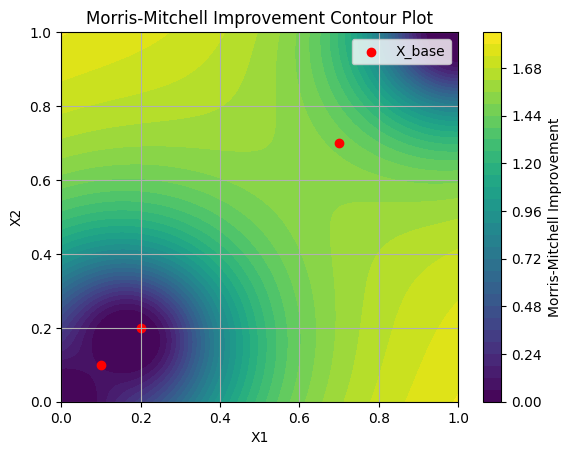

In [9]:
# Generate a contour plot with an initial X_base design and compute a grid of points to evaluate the Morris-Mitchell improvement function. The contour plot should visualize the improvement values across the grid.
import numpy as np
import matplotlib.pyplot as plt
from spotoptim.sampling.mm import mm_improvement
X_base = np.array([[0.1, 0.1], [0.2, 0.2], [0.7, 0.7]])
x1 = np.linspace(0, 1, 100)
x2 = np.linspace(0, 1, 100)
X1, X2 = np.meshgrid(x1, x2)
improvement_grid = np.zeros(X1.shape)
for i in range(X1.shape[0]):
    for j in range(X1.shape[1]):
        x = np.array([X1[i, j], X2[i, j]])
        improvement_grid[i, j] = mm_improvement(x, X_base, q=2, p=2)
plt.contourf(X1, X2, improvement_grid, levels=30, cmap='viridis')
plt.colorbar(label='Morris-Mitchell Improvement')
plt.scatter(X_base[:, 0], X_base[:, 1], color='red', label='X_base')
plt.title('Morris-Mitchell Improvement Contour Plot')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.grid()
plt.show()
